In [67]:
import matplotlib.pyplot as plt
from observable_jupyter import embed
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import json

In [37]:
wine = load_wine()
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [69]:
FIG_SIZE = (10, 7)
RANDOM_STATE = 9
features, target = load_wine(return_X_y=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

In [61]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [62]:
print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")


Prediction accuracy for the standardized test dataset with PCA
96.30%



In [63]:
pca_std = std_clf.named_steps["pca"]

In [64]:
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")


PC 1 with scaling:
[ 0.12436211 -0.22246885 -0.00861747 -0.21719999  0.13934692  0.41380799
  0.43196412 -0.2813358   0.31695811 -0.10169394  0.29240193  0.38952333
  0.28872603]


In [65]:
scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

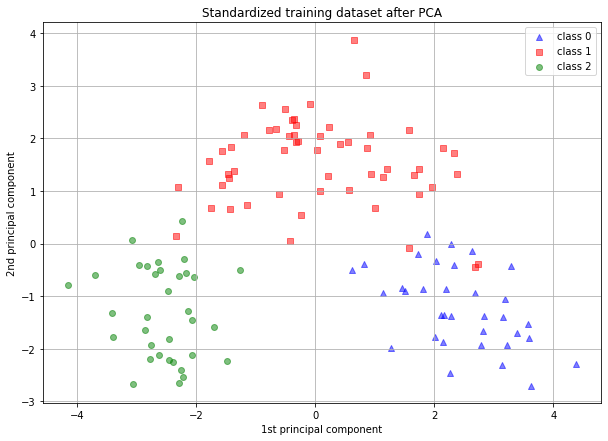

In [76]:
# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1) = plt.subplots(ncols=1, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
    
ax1.set_title("Standardized training dataset after PCA")
ax1.set_xlabel("1st principal component")
ax1.set_ylabel("2nd principal component")
ax1.legend(loc="upper right")
ax1.grid()